In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.colors
sns.set()

In [6]:
y_val=np.load('D:\\MalariaData\\y_val.npy')
print('val size',y_val.shape)
y_test=np.load('D:\\MalariaData\\y_test.npy')
print('test size',y_test.shape)
y_train=np.load('D:\\MalariaData\\y_train.npy')
print('train size',y_train.shape)

val size (4823,)
test size (8268,)
train size (14467,)


In [7]:
dfytrain=pd.DataFrame()
dfytest=pd.DataFrame()
dfyval=pd.DataFrame()
dfytrain['train']=y_train
dfytest['test']=y_test
dfyval['val']=y_val

Text(0, 0.5, 'Count')

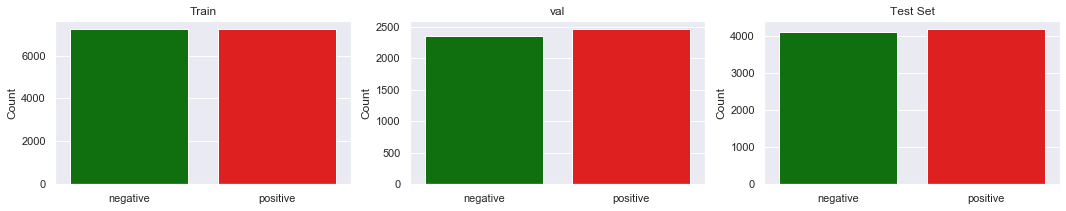

In [96]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",['red','green'])
plt.figure(figsize=(18,3))

plt.subplot(131)
plt.title('Train')
ax = sns.barplot(x=np.unique(y_train),y=dfytrain['train'].value_counts(),palette=['green','red'],order=[1,0])
ax.set_xticklabels(["negative","positive"])
plt.ylabel('Count')

plt.subplot(132)
plt.title('val')
ax = sns.barplot(x=np.unique(y_val),y=dfyval['val'].value_counts(),palette=['green','red'],order=[1,0])
ax.set_xticklabels(["negative","positive"])
plt.ylabel('Count')

plt.subplot(133)
plt.title('Test Set')
ax = sns.barplot(x=np.unique(y_test),y=dfytest['test'].value_counts(),palette=['green','red'],order=[1,0])
ax.set_xticklabels(["negative","positive"])
plt.ylabel('Count')

In [9]:
X_train=np.load('D:\\MalariaData\\X_train.npy')
print('X_train loaded!')
X_val=np.load('D:\\MalariaData\\X_val.npy')
print('X_val loaded!')
X_test=np.load('D:\\MalariaData\\X_test.npy')
print('X_test loaded!')

X_train loaded!
X_val loaded!
X_test loaded!


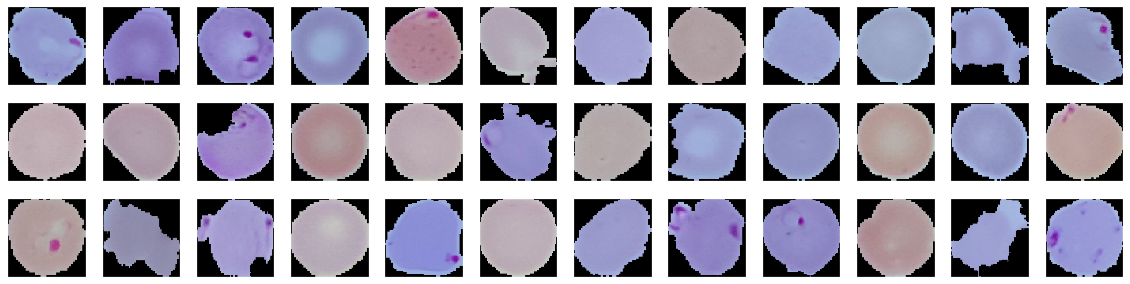

In [10]:
fig=plt.figure(figsize=(20,5))
for i in range(36):
  ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

In [11]:
X_train.shape

(14467, 100, 100, 3)

In [12]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
X_val=X_val.astype('float32')/255

In [13]:
import tensorflow as tf
print('tensorflow: ',tf.__version__,'imported!')

tensorflow:  2.0.0 imported!


In [14]:
from tensorflow import keras

In [42]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [16]:
IMAGE_SIZE=[100,100]

In [17]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [53]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)


In [54]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [55]:
# tell the model what cost and optimization method to use

model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['acc']
)


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_acc', min_delta=1e-3, patience=4, verbose=2, mode='auto',
        restore_best_weights=True)
hist=model.fit(X_train,y_train,batch_size=64,epochs=35,validation_data=(X_val,y_val),callbacks=[monitor],verbose=2,shuffle=True,)

Train on 14467 samples, validate on 4823 samples
Epoch 1/35
14467/14467 - 55s - loss: 0.3361 - acc: 0.8664 - val_loss: 0.2512 - val_acc: 0.9100
Epoch 2/35
14467/14467 - 48s - loss: 0.2235 - acc: 0.9191 - val_loss: 0.2142 - val_acc: 0.9210
Epoch 3/35
14467/14467 - 48s - loss: 0.1949 - acc: 0.9290 - val_loss: 0.1957 - val_acc: 0.9312
Epoch 4/35
14467/14467 - 48s - loss: 0.1790 - acc: 0.9374 - val_loss: 0.1885 - val_acc: 0.9341
Epoch 5/35
14467/14467 - 48s - loss: 0.1693 - acc: 0.9410 - val_loss: 0.1798 - val_acc: 0.9351
Epoch 6/35
14467/14467 - 48s - loss: 0.1625 - acc: 0.9423 - val_loss: 0.2110 - val_acc: 0.9268
Epoch 7/35
14467/14467 - 48s - loss: 0.1589 - acc: 0.9430 - val_loss: 0.1727 - val_acc: 0.9368
Epoch 8/35
14467/14467 - 48s - loss: 0.1501 - acc: 0.9477 - val_loss: 0.1748 - val_acc: 0.9359
Epoch 9/35
14467/14467 - 48s - loss: 0.1472 - acc: 0.9475 - val_loss: 0.1713 - val_acc: 0.9407
Epoch 10/35
14467/14467 - 48s - loss: 0.1472 - acc: 0.9478 - val_loss: 0.1678 - val_acc: 0.9390


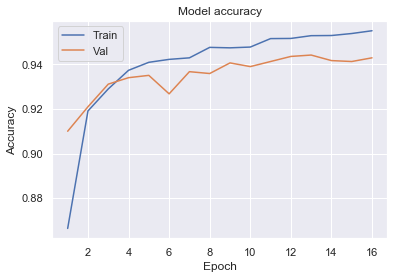

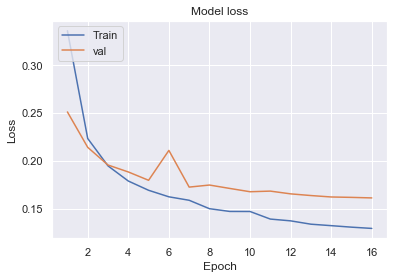

In [57]:
epoch=16
epoch_list=list(range(1,epoch+1))
# Plot training & validation accuracy values
plt.plot(epoch_list,hist.history['acc'])
plt.plot(epoch_list,hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_list,hist.history['loss'])
plt.plot(epoch_list,hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [58]:
score=model.evaluate(X_val,y_val,verbose=0,)
print('Val accuracy:',score[1])

Val accuracy: 0.9436036


In [59]:
from tensorflow.keras.models import load_model

model.save("model1.h5")  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
print('Model saved!!!')

Model saved!!!


In [1]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model1.h5")
print("Model Loaded!!!")

Model Loaded!!!


In [ ]:
score = loaded_model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [74]:
y_pred_test=model.predict(X_test)
y_pred_test[:5]

array([[0.8641403 ],
       [0.93235314],
       [0.94768846],
       [0.9817521 ],
       [0.00410828]], dtype=float32)

In [82]:
y_pred_test=y_pred_test>=0.5

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
cm

array([[3917,  264],
       [ 211, 3876]], dtype=int64)

Text(30.5, 0.5, 'Truth')

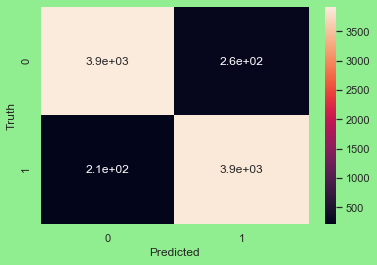

In [84]:
plt.figure(facecolor='lightgreen')
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [2]:
def predict(img_path):
  import numpy as np
  from PIL import Image
  import matplotlib.pyplot as plt
  import seaborn as sns
  #sns.set()
  fig = plt.figure(facecolor='yellow',figsize=(5,5)) # create the canvas for plotting
  img=Image.open(img_path)
  plt.subplot(121)
  plt.title('Input Image')
  plt.imshow(img)
  img=img.resize((100,100))
  img_array=np.array(img).astype('float32')/255
  result=np.ravel(loaded_model.predict(np.expand_dims(img_array,axis=0)))
  print('probablity: ',round((1-result[0])*100,2),'%')

  plt.show()


probablity:  99.92 %


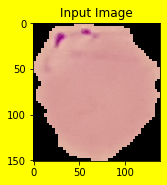

In [4]:
predict('positive1.png')

In [57]:
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from PIL import ImageTk, Image
filename=None
img=None

def upload():
    global filename,img,root,img2,uploaded
    filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("png files","*.png"),("all files","*.*")))#filetypes = (("jpeg files","*.jpg"),("all files","*.*"))
    #print (filename)
    img=Image.open(filename)
    img=img.resize((250,250))
    img = ImageTk.PhotoImage(img)
    label_1=Label(root,image=img)
    label_1.place(x=24,y=14,width="250",height="250")

   
fnt=('Arial',15,'bold')
def predict():
    l=Label(font=fnt)
    l.place(x=50,y=450)
    l['text']='The results are NIL'
    
def predict2():
  global filename
  import numpy as np
  from PIL import Image
  
  img2=Image.open(filename)
 # print('1')
  img2=img2.resize((100,100))
  img_array=np.array(img2).astype('float32')/255
  result=np.ravel(loaded_model.predict(np.expand_dims(img_array,axis=0)))
  txt='probablity: '+str(round((1-result[0])*100,2))+'%'
  p=1-result[0]
  print(p)
  if p>=0.5:
        f['bg']='red'
  else:
    f['bg']='green'
  #l=Label(font=fnt)
  #l.place(x=50,y=450)
  #l['text']=txt
  l=Label(root,font=fnt,text=txt,fg='Gray24',bg='turquoise1',relief=SUNKEN)
  l.place(x=50,y=425,width=188,height=45)
 

root = Tk()
root.configure(background='white')
root.title("Malaria Predictor")
root.iconbitmap("webp_net_resizeimage_wjy_icon.ico")
root.geometry("300x500")
f=Frame(root,width=300,height=500,bg='light steel blue')    
f.pack()
x=Button(root,cursor='hand2',text="Upload Image",bg="aquamarine",fg="Gray24",width=15,height=1,font=("open sans",14,'bold'),relief=RAISED,command=upload)
x.place(x=50,y=300)
y=Button(root,cursor='hand2',text="Predict",bg="aquamarine",fg="Gray24",width=15,height=1,font=("open sans",14,'bold'),relief=RAISED,command=predict2)
y.place(x=50,y=350)
label1=Label(root,cursor='xterm',bg='turquoise1',relief=SUNKEN,text='Input Image')
label1.place(x=25,y=15,width="250",height="250")
root.mainloop()

0.9997125422523823
0.12786877155303955
